#  Project Planning and Scoping

In [1]:
pip install pandas numpy seaborn matplotlib statsmodels

# Data Collection and Preparation 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [9]:
file_path = r"C:\Users\Anami\Downloads\House_Prices (2).xlsx"
df = pd.read_excel(file_path)
print(df.head())

   square_feet  bedrooms  bathrooms  age neighborhood   price
0         1642         3   2.028357    8            A  360086
1          851         4   2.100189   39            A  292548
2         1494         3   2.438823    6            A  446991
3         1300         2   2.253447   36            A  188396
4         1690         4   1.429328   11            A  157715


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   square_feet   26 non-null     int64  
 1   bedrooms      26 non-null     int64  
 2   bathrooms     26 non-null     float64
 3   age           26 non-null     int64  
 4   neighborhood  26 non-null     object 
 5   price         26 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ KB
None


In [11]:
print(df.describe())

       square_feet   bedrooms  bathrooms        age          price
count    26.000000  26.000000  26.000000  26.000000      26.000000
mean   1856.384615   2.538462   1.796296  32.384615  303738.961538
std     677.384032   0.989172   0.420761  13.148618  113596.245862
min     822.000000   1.000000   1.066547   5.000000    2348.000000
25%    1305.000000   2.000000   1.431455  26.000000  229015.000000
50%    1856.500000   3.000000   1.868434  35.000000  306867.500000
75%    2506.500000   3.000000   2.093243  42.000000  382064.500000
max    2887.000000   4.000000   2.438823  48.000000  498749.000000


In [12]:
print(df.head())

   square_feet  bedrooms  bathrooms  age neighborhood   price
0         1642         3   2.028357    8            A  360086
1          851         4   2.100189   39            A  292548
2         1494         3   2.438823    6            A  446991
3         1300         2   2.253447   36            A  188396
4         1690         4   1.429328   11            A  157715


In [13]:
print(df.tail())

    square_feet  bedrooms  bathrooms  age neighborhood   price
21         2496         3   2.317004   34            A  423417
22         2868         3   1.793626   42            A  357257
23         2611         3   1.066547   46            A  209106
24         2222         2   1.332654   28            A  237823
25         2887         1   1.437835   48            A    2348


In [15]:
print(df.isnull().sum())

square_feet     0
bedrooms        0
bathrooms       0
age             0
neighborhood    0
price           0
dtype: int64


In [16]:
print(df.dtypes)

square_feet       int64
bedrooms          int64
bathrooms       float64
age               int64
neighborhood     object
price             int64
dtype: object


In [17]:
print(df.columns)

Index(['square_feet', 'bedrooms', 'bathrooms', 'age', 'neighborhood', 'price'], dtype='object')


In [18]:
print(df.shape)

(26, 6)


# Exploratory Data Analysis (EDA) 

C:\Users\Anami\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


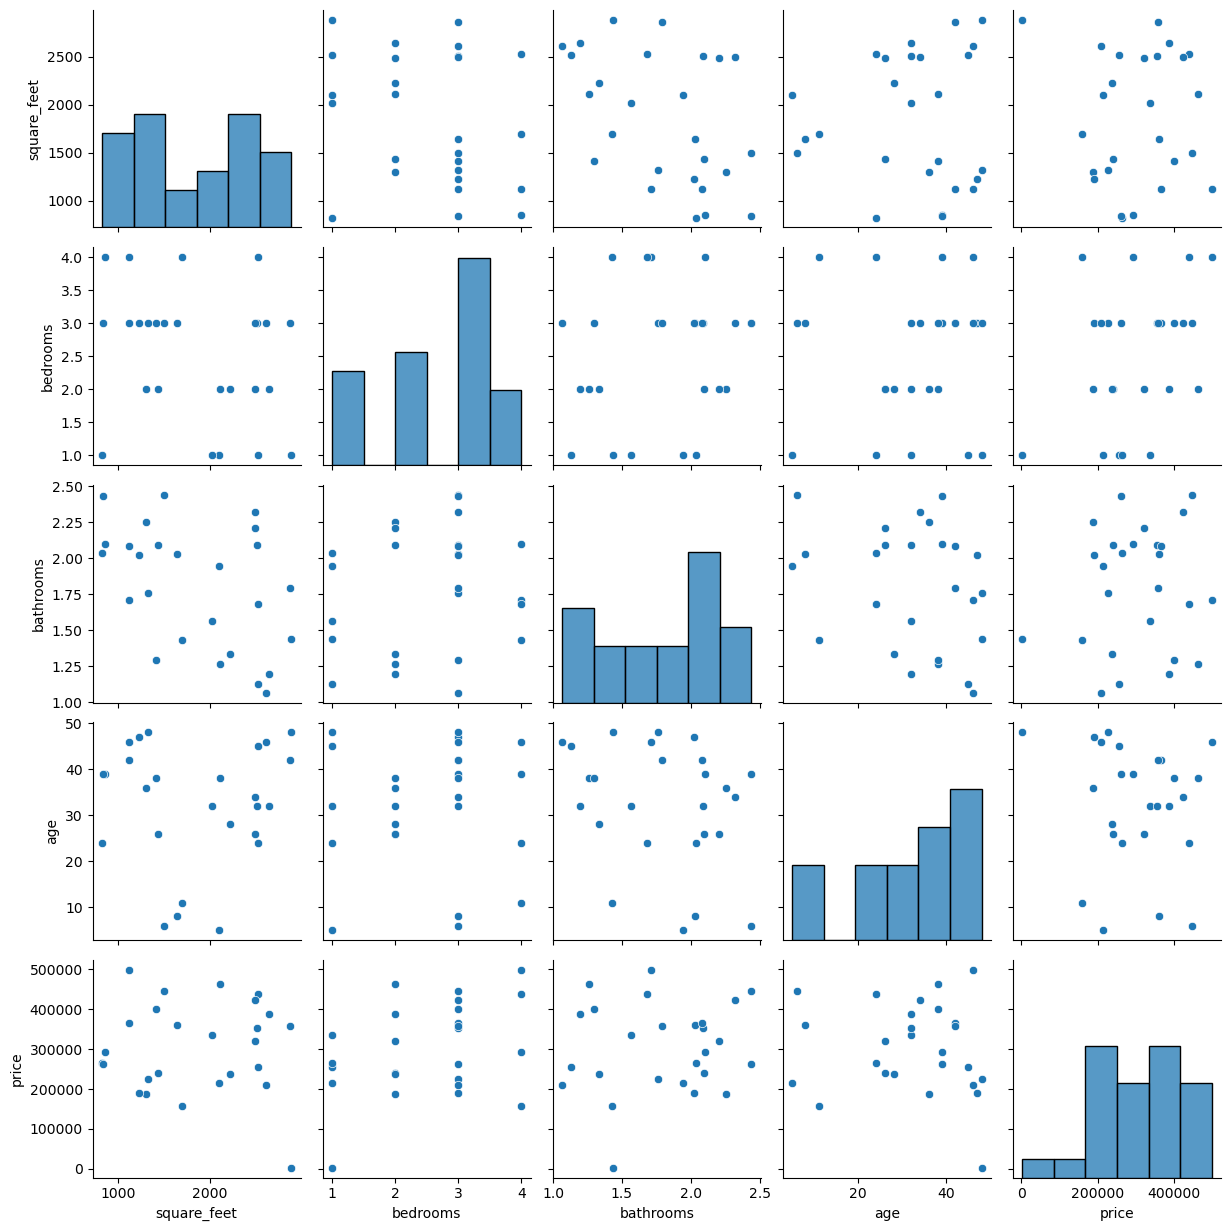

ValueError: could not convert string to float: 'A'

In [19]:
sns.pairplot(df)
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Model Building and Analysis

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
X = df[['square_feet', 'bedrooms', 'bathrooms', 'age']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Evaluating the model
print(f"Linear Regression R^2: {r2_score(y_test, y_pred)}")
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Linear Regression R^2: 0.2118168704721638
Linear Regression RMSE: 83036.74609522562


In [32]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluating the model
print(f"Ridge Regression R^2: {r2_score(y_test, y_pred_ridge)}")
print(f"Ridge Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")

Ridge Regression R^2: 0.2073216817196969
Ridge Regression RMSE: 83273.19822179677


In [33]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluating the model
print(f"Lasso Regression R^2: {r2_score(y_test, y_pred_lasso)}")
print(f"Lasso Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")

Lasso Regression R^2: 0.21181713444398265
Lasso Regression RMSE: 83036.73219023203


# Business Insights and Recommendations¶

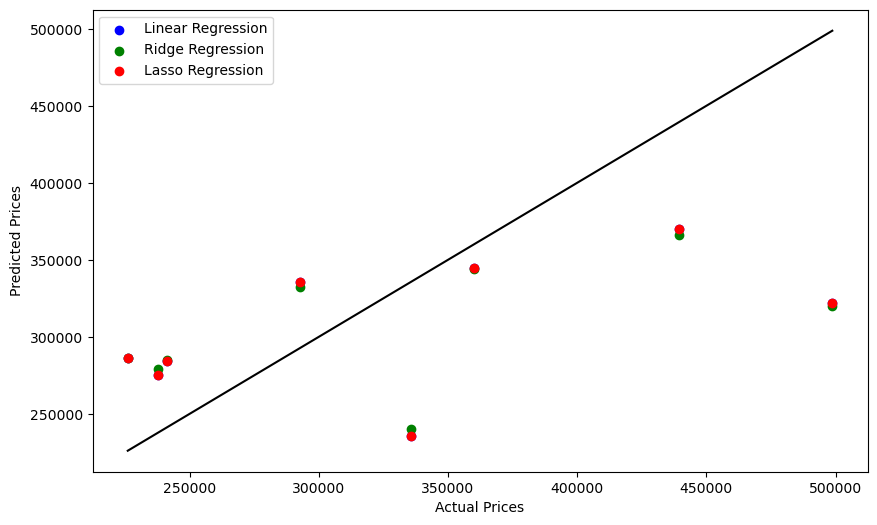

In [34]:
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="Linear Regression", color='blue')
plt.scatter(y_test, y_pred_ridge, label="Ridge Regression", color='green')
plt.scatter(y_test, y_pred_lasso, label="Lasso Regression", color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

# conclusion

In [ ]:
This project developed and evaluated regression models to predict house prices using features like square footage, bedrooms, bathrooms, and property age. Lasso Regression outperformed others, balancing accuracy and simplicity. Square footage and bedrooms emerged as key price drivers. Future improvements could involve adding more features and regularly updating the data.